# Crop prediction machine learning model

This project is my first attempt to an end-to-end machine learning project. The purpose of the project is to choose the best plant to grow in certain conditions and to choose from multiple machine learning models the one that performs best for this task.

For this I am using Scikit-Learn which is a robust library for machine learning in Python. It provides tools for machine learning and statistical modeling such as classification, regression, clustering, dimensionality reduction, model selection and preprocessing and it is designed to work alongside with Python's numerical and scientific libraries NumPy and SciPy. Another reason for choosing Scikit-learn is the fact that it has sensible defaults, which means that it's easy to get a pretty good model just by using its default settings. I am using a Jupyter notebook because it facilitates adding explanations and graphs next to the code.


## Problem definition

Agriculture plays an important role in the well-being of the human population and in the global economy as well. The crop yield – the amount of agricultural production harvested per unit of land area – is influenced by technological (agricultural practices), biological (diseases, pests, weeds) and environmental (climate, soil, water) factors.

Because most plant species need certain specific conditions to be satisfied in order to thrive and maximize the crop yield, a common problem existing among farmers is that the right crop based on their soil requirements and environmental conditions is not chosen resulting in a setback in productivity. However, an increase in crop yields has been demonstrated to significantly reduce poverty.


## Problem specification

Machine learning has the potential of solving the numerous challenges in the agricultural field such as the increasing need for food while also optimizing the effectiveness of the agricultural practices and taking care of the environment and providing healthy and safe food. This is the concern of precision agriculture – a modern farming technique whose main goal is defining a decision support system for the entire farm management.

In this project I want to use data of soil characteristics (Nitrogen, Phosphorus, Potassium and pH levels) and environmental conditions (rainfall, temperature and humidity) and suggest to the farmers the right crop based on their land specific parameters.

This is a classification problem and we need an algorithm that given certain conditions classifies each set of conditions according to the right plant. For this I will use the Decision Tree, Random Forest and K-Nearest Neighbor classification algorithms which are suitable for these sort of problems.


## Specification of the learning task

A computer program is said to learn from experience E with respect to some class of tasks T and performance measure P, if its performance at task T, as measured by P, improves with experience E.

The task T: predict the proper crop for the given conditions

The performance measure P: the percent of accurately predicted crops for the given conditions

The training experience E: labeled data with the best suited crop for some given conditions


## Target function to be learned

Target function is f : inputs -> outputs which is 100% accurate

The learning goal is to find the hypothesis h ≈ f that best fits the data

The target function to be learned: we need to find the function that given the inputs (the ratio of Nitrogen, Phosphorus, Potassium and the pH of the soil and the rainfall, temperature and humidity values) gives us the class/name of the crop/plant that would best fit the conditions given the input


## Step 1: gathering the data
The data used for this project was taken from this Kaggle dataset -> https://www.kaggle.com/atharvaingle/crop-recommendation-dataset/


## Step 2: data analysis and preparation




In [1]:
# import the needed libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import classification_report
import random
from __future__ import print_function
import warnings
warnings.filterwarnings('ignore')


Here we can see the first 5 instances in the dataset and the features/columns

In [2]:
# load the data 
df = pd.read_csv('Crop_recommendation.csv')
df.head()


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


Here are the columns which represent the features and the label column

In [3]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

Here are all the unique labels of the dataset

In [4]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

Below we can see the description of the dataset

We can see, for example, that the mean temperature is 25.61°C, that the minimum temperature is 8.82°C, while the maximum temperature is 43.67°C. We can see that 25% of the temperature values are below 22.76°C and 50% of them are below 25.59°C

In [5]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


When a feature is normally distributed (has a bell shape), the "68-95-99.7" rule applies -> approximately 68% of the values fall within one standard distribution (σ) of the mean, 95% within 2σ, and 99.7% within 3σ

Temperature seems to be normally distributed as seen in the histogram below, and since σ = 5°C, it means that 95% of the data falls within 2 x 5°C = 10°C from the mean = 25°C. Therefore around 95% of the temperature values fall between 15°C and 35°C, which seems appropriate if we look at the histogram below

(array([ 28.,  23., 172., 326., 684., 627., 198.,  88.,  28.,  26.]),
 array([ 8.82567475, 12.31065658, 15.79563841, 19.28062024, 22.76560207,
        26.2505839 , 29.73556573, 33.22054756, 36.70552939, 40.19051122,
        43.67549305]),
 <BarContainer object of 10 artists>)

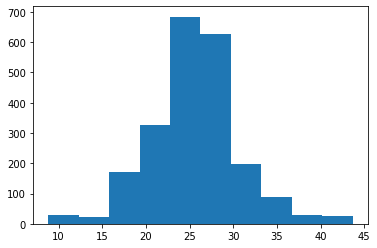

In [6]:
plt.hist(df['temperature'])

From the info() we can see that we deal with a pretty straightforward data set (2200 entries for each column)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


We check for null values and we see that there are no missing values

In [8]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

We can see in the plot below that for each plant/label we have the same number of points (i.e. 100) in the dataset, therefore we can say that we are dealing with a very balanced dataset

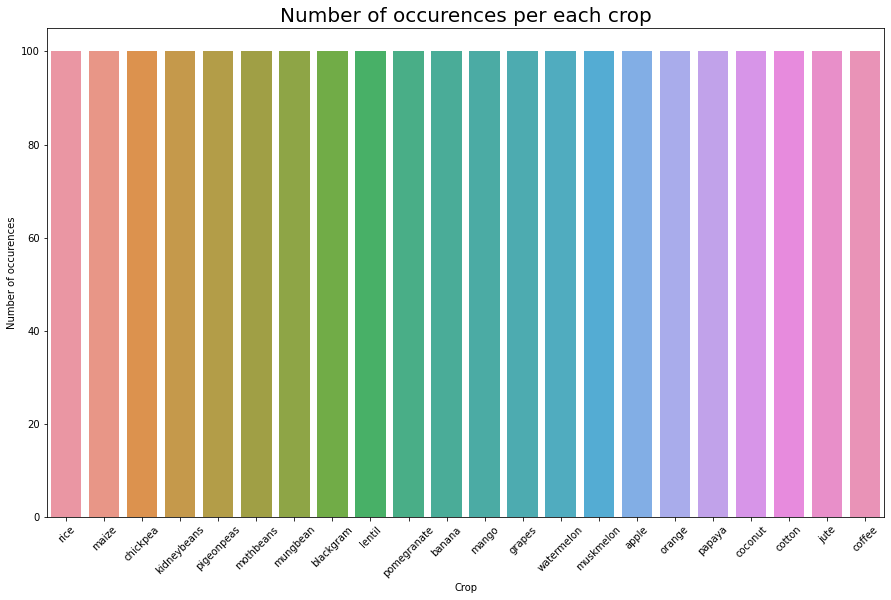

In [9]:
fig, ax = plt.subplots(1, 1, figsize = (15, 9))
sns.countplot(data = df, x = 'label')
ax.set(xlabel = 'Crop')
ax.set(ylabel = 'Number of occurences')
plt.xticks(rotation = 45)
plt.title('Number of occurences per each crop', fontsize = 20)
plt.show()

We want to see the correlation between all the features from the dataset and we do this using a heatmap and notice from the plot below that only the Phosphorus (P) and Potassium (K) have a high correlation

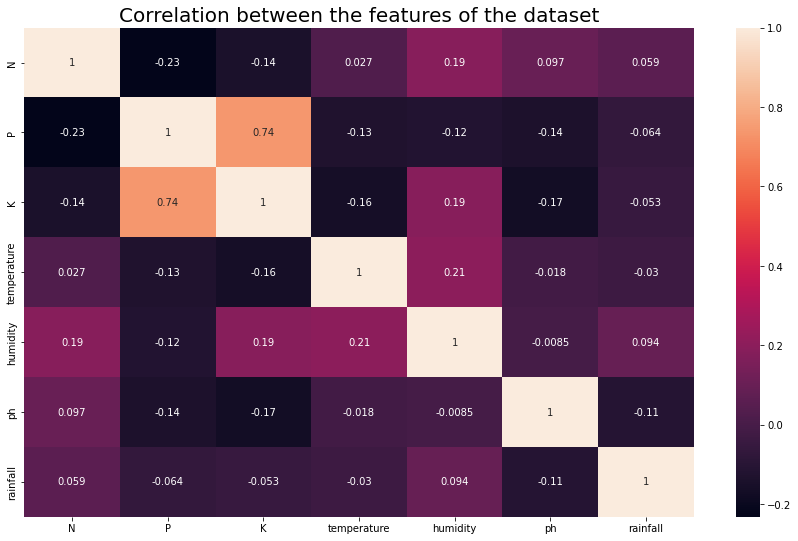

In [10]:
fig, ax = plt.subplots(1, 1, figsize = (15, 9))
sns.heatmap(df.corr(), annot = True)
plt.title('Correlation between the features of the dataset', fontsize = 20)
plt.show()

#### To choose between multiple models, the best practice is to divide the entire dataset in three - training, validation and test data

First, put aside the test data for the final performance measure and then the data that is left should be further divided into training data (for training the model) and validation data (for choosing the best model)

For training the models we should use cross-validation = randomly splitting the training set into k distinct subsets (folds) and then training and evaluating the model k times, picking a different fold for evaluation every time and training it on the other k-1 folds

Steps:
- use the training dataset to train a few candidate models
- use the validation dataset to evaluate the candidate models
- choose one of the candidate models
- train the chosen model on both the training and the validation dataset (so that we have more data to train the model better)
- evaluate the final model on the test dataset


In the dataset, the plants were in order (100 conditions for rice, followed by 100 conditions for maize a.s.o.), so we randomize their apparition in the dataset to avoid sampling bias

We try to use stratified sampling (dividing the test set to be representative of the overall population)

Now is the time to put aside a test set which will be kept away until after finishing training the models



In [11]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']

# lists to keep the names and the accuracy of the models
accuracy = []
model = []

accuracy_and_model = {}

# randomizing the order of the data points and splitting the dataset into training and testing data (80%-20%)

from sklearn.model_selection import train_test_split
x_train_and_validation, x_test, y_train_and_validation, y_test = train_test_split(features, target, test_size = 0.20, random_state = 42, stratify=df['label'])

print(y_train_and_validation.head())
print(pd.value_counts(y_train_and_validation))

print("---------")
print(y_test.head())
print(pd.value_counts(y_test))

print("---------")
# checking if the size of all the subsets matches the dataset and everything seems fine
print(df.size)
print(x_train_and_validation.size)
print(x_train_and_validation.size + y_train_and_validation.size + x_test.size + y_test.size)


1607         orange
1212         grapes
362     kidneybeans
566       mothbeans
1671         orange
Name: label, dtype: object
orange         80
grapes         80
coconut        80
papaya         80
pomegranate    80
mango          80
jute           80
watermelon     80
rice           80
maize          80
pigeonpeas     80
blackgram      80
apple          80
muskmelon      80
coffee         80
mungbean       80
lentil         80
banana         80
cotton         80
mothbeans      80
kidneybeans    80
chickpea       80
Name: label, dtype: int64
---------
1609    orange
1072    banana
1912    cotton
100      maize
1645    orange
Name: label, dtype: object
orange         20
banana         20
pigeonpeas     20
mungbean       20
lentil         20
papaya         20
coconut        20
coffee         20
jute           20
kidneybeans    20
apple          20
mango          20
grapes         20
mothbeans      20
pomegranate    20
watermelon     20
blackgram      20
rice           20
chickpea       


## Step 3: choosing models that are suitable

This is a classification task. We want to find the function that given the inputs (the ratio of Nitrogen, Phosphorus, Potassium and the pH of the soil and the rainfall, temperature and humidity values) gives us the name of the plant that would best fit the conditions given in the input.

Models to consider for this task:

### Decision tree
Decision trees are tree-like structures that help with decision taking. The decision tree algorithm is useful since it can be used for both classification and regression tasks. Their goal is to extract features and discover patterns in data in order to be able to move towards generalized models from concrete examples.

The structure of a decision tree is as follows:
- The root node: it represents the entire set of data being analyzed and it gets split into sub-nodes that represent subsets of the data
- Internal nodes: represent a sub-node that can be further split into more sub-nodes
- Leaf nodes: these are the sub-nodes that cannot be split anymore, and they usually represent one of the possible targets, that is, a class / probability of a class or a numerical value

In order to split a node into sub-nodes, there need to be some decision rules – we can compute impurities/information gain and choose from all the features the feature that minimizes the impurity/maximizes the information gain. In order to compute this, in the case of a classification task, we can use the Gini impurity or Entropy.

### Random forest
Random forests are an ensemble of decision trees where each tree is generated a on different set of data that is randomly and independently sampled with replacement.

To improve the robustness of the algorithm with respect to noise and to lower the error rates, a random selection of features is used when splitting each node.

As the number of decision trees in the forest gets larger, the generalization error for the random forest converges to a limit. The generalization error is conditioned by the strength of the individual trees and also by the correlation between the trees.

Internal estimates are used to monitor error, strength, correlation, to measure variable importance and to analyze the result of increasing the number of features that are used in the splitting.

Random forests can be used for both classification tasks using the majority vote and for regression tasks by averaging.

Ensemble learning uses the idea of the “wisdom of crowds” which proposes that the decision making of a larger group is usually better than that of an individual. Therefore, an ensemble of base learners will achieve a better final prediction when working together. While a base learner may not perform that well on its own because of high bias and variance, aggregating more base learners that were individually trained might give a better performance of the model, as their combination will reduce the bias and variance. While decision trees can have high variance and bias, ensemble learning can help with finding a bias-variance tradeoff.

### K-Nearest Neighbor
The kNN algorithm can be used both for regression and classification tasks, but in general, it is mostly used for classification problems. This algorithm classifies new data based on its proximity to k-neighbors. For example if a new data point is surrounded by training data that is of class "rice", for example, we conclude that the new data is also of class "rice"


## Step 4: training the default models and trying to improve the results by manual hyperparameter tuning, by grid search and by randomized search

Note: we can set a random seed with the purpose of achieving reproducibility while maintaining randomness. This is helpful for:
- splitting data into training/validation/test sets to ensure that the data is divided the same way every time the code is run
- training non-deterministic models such as random forest and gradient boosting, so that we can reproduce the models and the results
- comparing results when tuning hyperparameters, because we want to ensure that we use the same data

I would also like to save the models I experiment with, using joblib.dump()

### Decision tree

Let's start by letting all the parameters of the decision tree to be the default ones from the library and then try to manually tune the hyperparameters such that we obtain better predictions. We can see below that the accuracy we obtain using random_state=42 is 98.33%

In [12]:
from sklearn.tree import DecisionTreeClassifier

dt_default = DecisionTreeClassifier(random_state=42)
# is equivalent to:
# dt_default = DecisionTreeClassifier(criterion = 'gini', splitter = 'best', max_depth = None, max_features = None, random_state=42)


Now we further split data into training and validation data by setting the cross validation data not to be the entire dataset, but the entire dataset minus the final test dataset

In [13]:
from sklearn.model_selection import cross_val_score

score_dt_default = cross_val_score(dt_default, x_train_and_validation, y_train_and_validation, cv=5)

print("the scores obtained with cross validation on the default decision tree are %s" % score_dt_default)
print(f"{score_dt_default.mean():0.5f} mean accuracy with a standard deviation of {score_dt_default.std():0.5f}")

accuracy_and_model["default decision tree"] = score_dt_default.mean().round(5)
print(accuracy_and_model)


the scores obtained with cross validation on the default decision tree are [0.97159091 0.99147727 0.98295455 0.99147727 0.98863636]
0.98523 mean accuracy with a standard deviation of 0.00749
{'default decision tree': 0.98523}


Let's try to make a decision tree on the training and validation dataset and plot it to get a better insight on how the model was built

In [14]:
dt_default.fit(x_train_and_validation, y_train_and_validation)
predicted_values = dt_default.predict(x_test)
x = metrics.accuracy_score(y_test, predicted_values)

print("default decision tree's accuracy is: ", x*100 )
print(classification_report(y_test, predicted_values))

default decision tree's accuracy is:  97.95454545454545
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       1.00      0.80      0.89        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        20
        jute       0.95      0.95      0.95        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.86      0.90      0.88        20
       maize       0.95      1.00      0.98        20
       mango       1.00      1.00      1.00        20
   mothbeans       0.86      0.95      0.90        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        20
      orange       1.00  

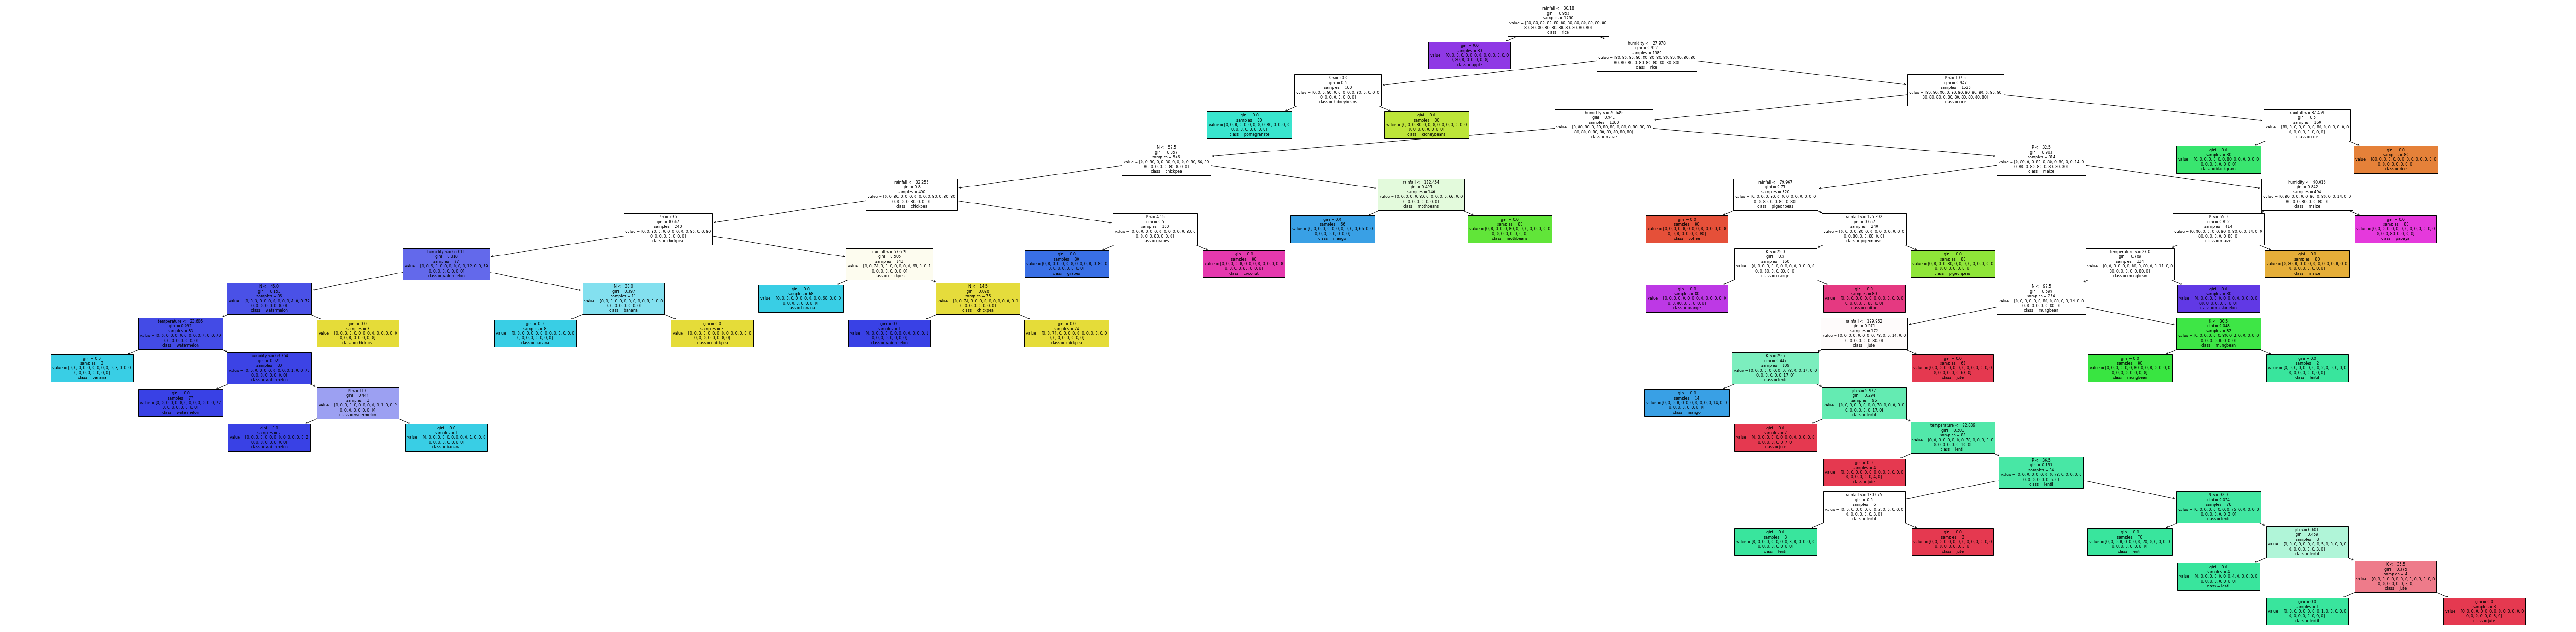

In [15]:
plt.figure(figsize=(100,25))
import matplotlib.pyplot as plt

fig = tree.plot_tree(dt_default, feature_names = df.columns, class_names = df['label'].unique() , filled = True, fontsize = 8)
plt.savefig("decision_tree_default.png", dpi = 100)


#### Manually improving the results
After some hyperparameter tuning, from my observations we can get a better accuracy by:
- using Entropy for information gain instead of Gini impurity
- the most efficient way to split the nodes is by using the "best" split (the one that minimizes impurity/maximizes information gain) instead of a "random" one which does not compute the optimal split; however the random option lowers the computational cost
- regarding the max_depth of the tree, if "None", then the tree is expanded until all leaves are pure or until all leaves contain less than 2 samples; in theory, the maximum depth of a decision tree is one less than the number of training samples but that would leave us with a major overfitting issue (the maximum depth is not the number of training features because the data can be split on the same feature multiple times); after many tries, I noticed that using the default "None" offers the best accuracy, but probably overfits to the training data
- the max_features refers to the number of features to consider when looking for the best split which is better to be smaller; the default value is equal to the number of features in the dataset, may lead to overfitting and is computationally heavy to always consider all the features every single time, so I tried to set it to be the square root of the number of features, however this lowered the obtained accuracy so I left it on default "None"

In the end I settled for the default values, the only change being the split criterion which I changed to Entropy. This way the accuracy obtained by using cross-validation decreased to 98.011% from 98.523%, but the accuracy obtained when training on the whole training + validation data increased from  97.954% to 98.409%

In [16]:
dt_tuned = DecisionTreeClassifier(criterion = 'entropy', splitter = 'best', max_depth = None , max_features = None)


score_dt_tuned = cross_val_score(dt_tuned, x_train_and_validation, y_train_and_validation, cv=5)

print("the scores obtained with cross validation on the manually tuned decision tree are %s" % score_dt_tuned)
print(f"{score_dt_tuned.mean():0.5f} mean accuracy with a standard deviation of {score_dt_tuned.std():0.5f}")

accuracy_and_model["manually tuned decision tree"] = score_dt_tuned.mean().round(5)
print(accuracy_and_model)

the scores obtained with cross validation on the manually tuned decision tree are [0.98011364 0.97727273 0.98295455 0.98863636 0.96875   ]
0.97955 mean accuracy with a standard deviation of 0.00658
{'default decision tree': 0.98523, 'manually tuned decision tree': 0.97955}


In [17]:
dt_tuned.fit(x_train_and_validation, y_train_and_validation)
predicted_values = dt_tuned.predict(x_test)

x = metrics.accuracy_score(y_test, predicted_values)
accuracy.append(x)
model.append("tuned decision tree")
print("tuned decision tree's accuracy is: ", x*100 )
print(classification_report(y_test, predicted_values))

tuned decision tree's accuracy is:  98.4090909090909
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       1.00      0.85      0.92        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        20
        jute       0.91      1.00      0.95        20
 kidneybeans       1.00      0.95      0.97        20
      lentil       1.00      1.00      1.00        20
       maize       0.95      1.00      0.98        20
       mango       1.00      1.00      1.00        20
   mothbeans       0.87      1.00      0.93        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       0.95      1.00      0.98        20
      orange       1.00     

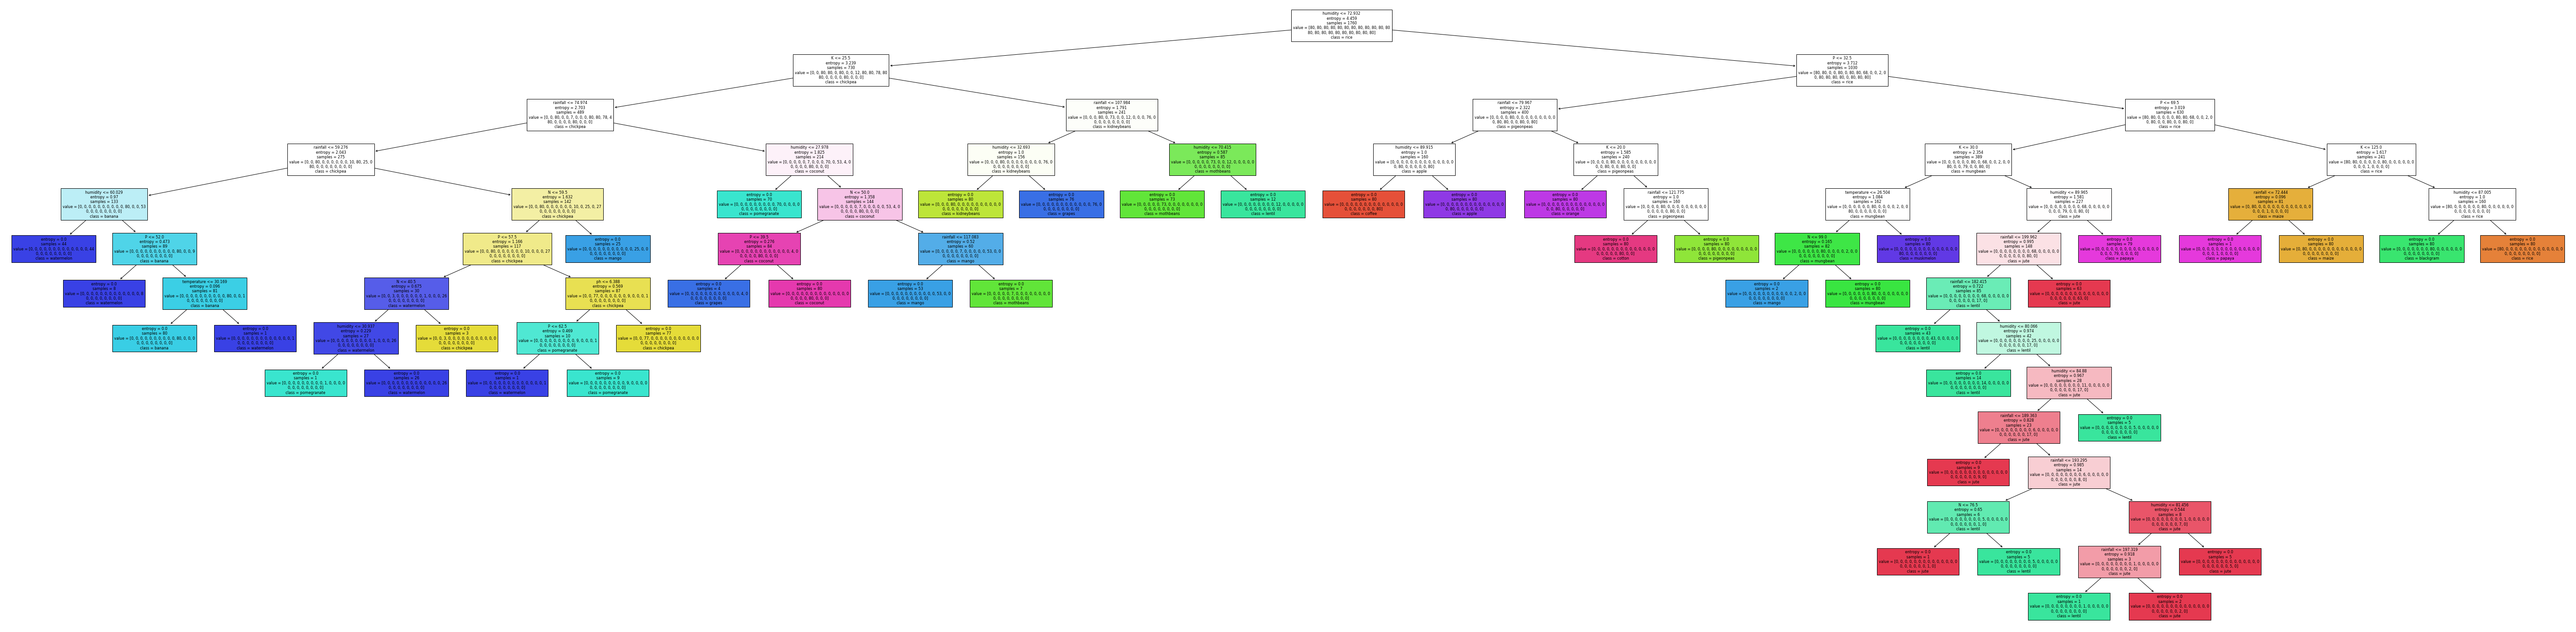

In [18]:
plt.figure(figsize=(100,25))
import matplotlib.pyplot as plt

fig = tree.plot_tree(dt_tuned, feature_names = df.columns, class_names = df['label'].unique() , filled=True, fontsize=8)
plt.savefig("decision_tree_tuned.png", dpi=100)


Conclusion: manually tuning parameters after doing some research did not help with the mean accuracy obtained after using cross-validation, but it helped with the model trained on both training and validation data, and then tested on the test data

### K-Nearest Neighbor

For this model I started by using the default hyperparameters for the kNN together with cross-validation and the accuracy we get is 97.727%, so I will try to tune the hyperparameters using grid search to see if there is room for any improvement

In [19]:
from sklearn.neighbors import KNeighborsClassifier

knn_default = KNeighborsClassifier()
# which is equivalent to
# default_knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)

score_knn_default = cross_val_score(knn_default, x_train_and_validation, y_train_and_validation, cv=5)

print("the scores obtained with cross validation on the default k-nearest neighbors are %s" % score_knn_default)
print(f"{score_knn_default.mean():0.5f} mean accuracy with a standard deviation of {score_knn_default.std():0.5f}")

accuracy_and_model["default knn"] = score_knn_default.mean().round(5)
print(accuracy_and_model)

the scores obtained with cross validation on the default k-nearest neighbors are [0.97727273 0.97159091 0.98579545 0.97727273 0.97443182]
0.97727 mean accuracy with a standard deviation of 0.00475
{'default decision tree': 0.98523, 'manually tuned decision tree': 0.97955, 'default knn': 0.97727}


An interesting thing to do might be to plot the accuracy of the knn model for a number of neighbors ranging from 1 to 20 for example and see which value has the best impact on the accuracy

In [20]:
mean_acc = np.zeros(21)
for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors = i).fit(x_train_and_validation, y_train_and_validation)
    pred= knn.predict(x_test)
    mean_acc[i] = metrics.accuracy_score(y_test, pred)

mean_acc

array([0.        , 0.98636364, 0.97045455, 0.97954545, 0.98181818,
       0.97727273, 0.97727273, 0.98181818, 0.97954545, 0.98636364,
       0.98181818, 0.98636364, 0.975     , 0.98409091, 0.975     ,
       0.97954545, 0.975     , 0.97954545, 0.97045455, 0.975     ,
       0.97045455])

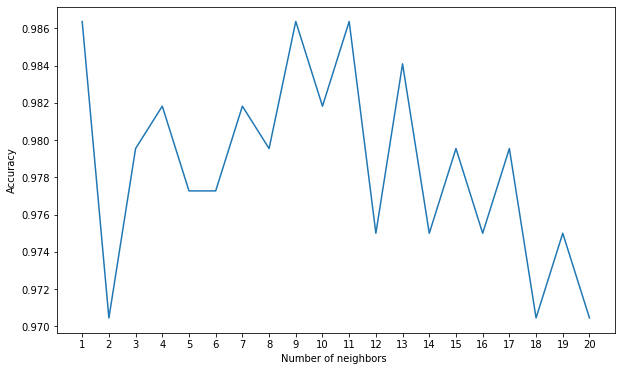

In [21]:
loc = np.arange(1,21,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,21), mean_acc[1:])
plt.xticks(loc)
plt.xlabel('Number of neighbors ')
plt.ylabel('Accuracy')
plt.show()

We can draw the conclusion that choosing the number of neighbors to be equal to 9 or 11 gives us the best accuracy for the model

### Improving the results with grid search
To choose the best hyperparameters we can also use the  grid search technique for hyperparameter optimization and use for the number of neighbors only the best and close to best values (i.e. 5, 6 and 7) and for the others we put all the possible values. We will get a best_score and best_params and we can use those to get the best accuracy of the model

In [22]:
# default_knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)

grid_params = { 'n_neighbors' : [5, 6, 7, 8, 9, 10, 11],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan'],
              'leaf_size': [30],
              'algorithm' : ['ball_tree', 'kd_tree', 'brute', 'auto']}

In [23]:
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv = 3, n_jobs = -1)

In [24]:
g_res = gs.fit(x_train_and_validation, y_train_and_validation)


Fitting 3 folds for each of 168 candidates, totalling 504 fits


In [25]:
g_res.best_score_

0.9795435032453249

In [26]:
g_res.best_params_

{'algorithm': 'ball_tree',
 'leaf_size': 30,
 'metric': 'manhattan',
 'n_neighbors': 6,
 'weights': 'distance'}

In [27]:
knn_grid_search = KNeighborsClassifier(n_neighbors=6, weights='distance', algorithm='ball_tree', leaf_size=30, metric='manhattan')

score_knn_grid_search = cross_val_score(knn_grid_search, x_train_and_validation, y_train_and_validation, cv=5)

print("the scores obtained with cross validation on the grid search tuned k-nearest neighbors are %s" % score_knn_grid_search)
print(f"{score_knn_grid_search.mean():0.5f} mean accuracy with a standard deviation of {score_knn_grid_search.std():0.5f}")

accuracy_and_model["grid search knn"] = score_knn_grid_search.mean().round(5)
print(accuracy_and_model)

the scores obtained with cross validation on the grid search tuned k-nearest neighbors are [0.98011364 0.98011364 0.99431818 0.98579545 0.97443182]
0.98295 mean accuracy with a standard deviation of 0.00672
{'default decision tree': 0.98523, 'manually tuned decision tree': 0.97955, 'default knn': 0.97727, 'grid search knn': 0.98295}


Conclusion: grid search helped bring the accuracy obtained with cross validation from 97.727% to 98.285%

We could try to use the entire train and validation dataset to train the tuned model and then test on the test data to see if there are any improvements. We can see that by training on more data we get a 98.409% accuracy, given the fact that we had a larger training dataset

In [28]:
knn_grid_search.fit(x_train_and_validation, y_train_and_validation)
predicted_values = knn_grid_search.predict(x_test)
x = metrics.accuracy_score(y_test, predicted_values)

print("grid search k-nearest neighbor's accuracy is: ", x*100 )
print(classification_report(y_test, predicted_values))


grid search k-nearest neighbor's accuracy is:  98.4090909090909
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       0.95      1.00      0.98        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       0.95      1.00      0.98        20
      grapes       1.00      1.00      1.00        20
        jute       0.86      0.95      0.90        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      0.95      0.97        20
       maize       1.00      0.95      0.97        20
       mango       1.00      1.00      1.00        20
   mothbeans       0.95      1.00      0.98        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        20
      orange     

### Random forest

We train a random forest model and by using the default parameters we get the greatest accuracy so far: 99.318%

In [29]:
from sklearn.ensemble import RandomForestClassifier
rf_default = RandomForestClassifier(random_state = 42)
# equivalent to
# rf_default = RandomForestClassifier(n_estimators=100, criterion="gini", max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features="sqrt", bootstrap=True, random_state = 42)

score_rf_default = cross_val_score(rf_default, x_train_and_validation, y_train_and_validation, cv=5)

print("the scores obtained with cross validation on the default random forest are %s" % score_rf_default)
print(f"{score_rf_default.mean():0.5f} mean accuracy with a standard deviation of {score_rf_default.std():0.5f}")

accuracy_and_model["default random forest"] = score_rf_default.mean().round(5)
print(accuracy_and_model)

the scores obtained with cross validation on the default random forest are [0.99147727 0.99431818 0.99715909 0.99715909 0.98579545]
0.99318 mean accuracy with a standard deviation of 0.00425
{'default decision tree': 0.98523, 'manually tuned decision tree': 0.97955, 'default knn': 0.97727, 'grid search knn': 0.98295, 'default random forest': 0.99318}


### Improving the results using random search
We now want to see if there is any room for improvement and for this we use random search

In [30]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

param_dist = {"max_depth": [3, None],
              "max_features": [sp_randint(1, 5), "sqrt", "log2"],
              "min_samples_split": sp_randint(1, 10),
              "min_samples_leaf": sp_randint(1, 5),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"],
              "n_estimators": [100, 200]}
n_iter_search = 100
random_search = RandomizedSearchCV(rf_default, param_distributions=param_dist,
                                   n_iter=n_iter_search)
# fit the random search model
random_search.fit(x_train_and_validation, y_train_and_validation)


RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),
                   n_iter=100,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, None],
                                        'max_features': [<scipy.stats._distn_infrastructure.rv_frozen object at 0x000001E235BE2AF0>,
                                                         'sqrt', 'log2'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001E235BC3730>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001E235C024C0>,
                                        'n_estimators': [100, 200]})

In [31]:
random_search.best_score_

0.9954545454545454

In [32]:
random_search.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 200}

We get an even better accuracy of 99.545% after searching for the best parameters using random search

In [42]:
from sklearn.ensemble import RandomForestClassifier
rf_random_search = RandomForestClassifier(n_estimators=100, criterion="gini", max_depth=None, min_samples_split=6, min_samples_leaf=1, max_features="sqrt", bootstrap=False, random_state = 42)

score_rf_random_search = cross_val_score(rf_random_search, x_train_and_validation, y_train_and_validation, cv=5)

print("the scores obtained with cross validation on the default random forest are %s" % score_rf_random_search)
print(f"{score_rf_random_search.mean():0.5f} mean accuracy with a standard deviation of {score_rf_random_search.std():0.5f}")

accuracy_and_model["random search random forest"] = score_rf_random_search.mean().round(5)
print(accuracy_and_model)

the scores obtained with cross validation on the default random forest are [0.99431818 0.99431818 1.         1.         0.99147727]
0.99602 mean accuracy with a standard deviation of 0.00341
{'default decision tree': 0.98523, 'manually tuned decision tree': 0.97955, 'default knn': 0.97727, 'grid search knn': 0.98295, 'default random forest': 0.99318, 'random search random forest': 0.99602}


Conclusion: after using random search on many parameters for the random forest classifier, we obtained the greatest cross validation scores with mean accuracy of 99.602% and we can declare this model to be the best one, the one we want to train on both the training and the validation datasets and finally test on the test dataset

## Step 5: evaluation to assess the performance of the model

Firstly, let's compare the accuracies obtained when simply splitting the data into training and test data

A good way to visualize the accuracies of the models is by plotting them in a barplot as below

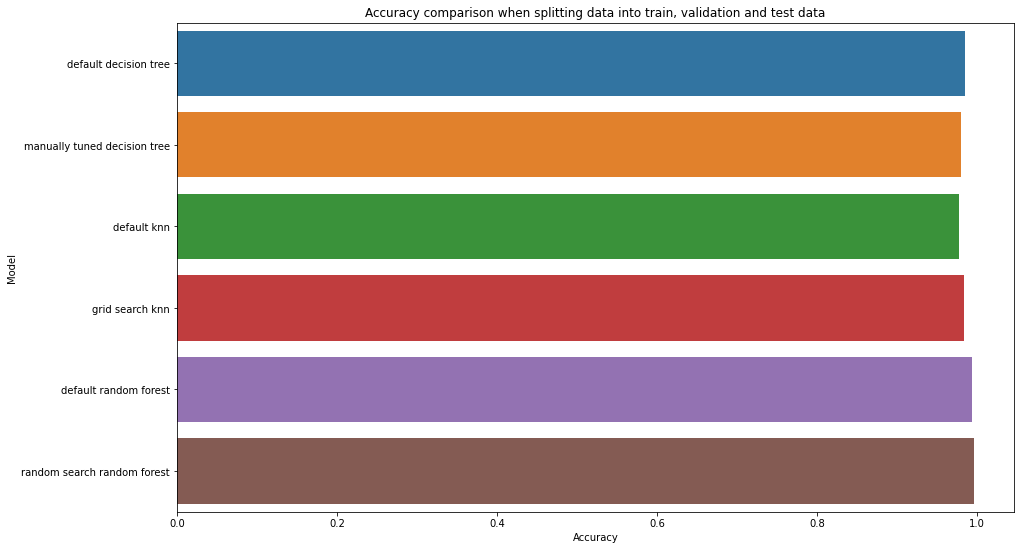

In [43]:
plt.figure(figsize=(15,9))
plt.title('Accuracy comparison when splitting data into train, validation and test data')
plt.xlabel('Accuracy')
plt.ylabel('Model')
sns.barplot(x = list(accuracy_and_model.values()), y = list(accuracy_and_model.keys()))
plt.show()

Here we can see the numerical values of the accuracies of the models:

In [44]:
for m, a in accuracy_and_model.items():
    print (m, '-->', a)

default decision tree --> 0.98523
manually tuned decision tree --> 0.97955
default knn --> 0.97727
grid search knn --> 0.98295
default random forest --> 0.99318
random search random forest --> 0.99602


### Conclusion
The best model from the ones we tried is the random forest model obtained after using random search to find the best parameters, and we will now train that model on both training and validation data and test it on the test data we put aside at the beginning

As we can see below, after adding more data, the model's accuracy goes from 99.602% accuracy to 99.318%, which is not necessarily a bad thing since this might prevent overfitting and the accuracy is still very good

The benefits of random forests compared to decision trees:
- they have a much lower risk of overfitting
- they are more robust to noise and outliers

In [45]:
rf_random_search.fit(x_train_and_validation, y_train_and_validation)
predicted_values = rf_random_search.predict(x_test)
x = metrics.accuracy_score(y_test, predicted_values)

print("random search random forest's accuracy is: ", x*100 )
print(classification_report(y_test, predicted_values))

random search random forest's accuracy is:  99.31818181818181
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       1.00      0.95      0.97        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        20
        jute       0.95      1.00      0.98        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      0.95      0.97        20
       maize       0.95      1.00      0.98        20
       mango       1.00      1.00      1.00        20
   mothbeans       0.95      1.00      0.98        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        20
      orange       



## Step 6: using the model to get predictions

This is a generated pdf of the jupyter notebook I made for this project. This way, step-by-step clear explanations of the dataset, code, models, concepts and plots are put together to help the user better understand the machine learning models and the code. Furthermore, below I added some code that allows the user to input some values and get crop predictions for those values.

Here, I used the model that had the best accuracy, namely, the random search random forest to give predictions for the suitable crop for a given set of conditions.

The range in the dataset and the order of the conditions to be given is:

- N (ratio of Nitrogen content in soil) -> between 0 and 140
- P (ratio of Phosphorus content in soil) -> between 5 and 145
- K (ration of Potassium content in soil) -> between 5 and 205
- temperature (in degrees Celsius) -> between 8 and 43
- humidity (relative humidity in %) -> between 14 and 99
- pH (value of the pH of the soil) -> between 3.5 and 9,9
- rainfall (rainfall in mm) -> between 20 and 298


The user can see and modify the examples below



In [55]:
data_point = np.array([[10, 20, 30, 23, 60, 7, 150]])
prediction = rf_random_search.predict(data_point)
print(prediction)

['mango']


In [47]:
data_point = np.array([[100, 45, 70, 30, 71, 5, 100]])
prediction = rf_random_search.predict(data_point)
print(prediction)

['chickpea']


In [48]:
data_point = np.array([[80, 30, 30, 15, 80, 8, 100]])
prediction = rf_random_search.predict(data_point)
print(prediction)

['coffee']


In [54]:
data_point = np.array([[50, 45, 20, 30, 30, 5, 100]])
prediction = rf_random_search.predict(data_point)
print(prediction)

['pigeonpeas']


In [57]:
data_point = np.array([[20, 70, 100, 5, 80, 3, 20]])
prediction = rf_random_search.predict(data_point)
print(prediction)

['muskmelon']
